In [1]:
import sys
pkg_path = '/media/khaledghobashy/New Volume/Main/asurt_cdt_symbolic'
pkg_path = r'C:\Users\khaled.ghobashy\Desktop\asurt_cdt_symbolic'
sys.path.append(pkg_path)

In [3]:
import numpy as np
from source.interfaces.scripting_interfaces import multibody_system, simulation

from use_cases.generated_templates.assemblies import front_axle_assembly as assembly

from use_cases.generated_templates.configurations import dwb_cfg
from use_cases.generated_templates.configurations import steer_cfg
from use_cases.generated_templates.configurations import front_axle_testrig_bcfg

In [4]:
model = multibody_system(assembly)

In [5]:
model.Subsystems.SU.set_configuration_file(dwb_cfg)
model.Subsystems.SU.set_configuration_data('dwb_st500_axletech.csv')

model.Subsystems.ST.set_configuration_file(steer_cfg)
model.Subsystems.ST.set_configuration_data('steer_st500_axletech.csv')

model.Subsystems.TR.set_configuration_file(front_axle_testrig_bcfg)
model.Subsystems.TR.set_configuration_data('front_axle_testrig_bcfg_1.csv')

In [6]:
model.Subsystems.TR.config.AF_jcs_steer_gear = lambda t : np.deg2rad(15)*np.sin(t)
model.Subsystems.TR.config.AF_mcr_ver_act = lambda t : 170*np.sin(t)
model.Subsystems.TR.config.AF_mcl_ver_act = lambda t : 170*np.sin(t)
model.Subsystems.TR.config.AF_jcr_rev = lambda t :  np.deg2rad(360)*t
model.Subsystems.TR.config.AF_jcl_rev = lambda t : -np.deg2rad(360)*t


In [7]:
soln = simulation('dwb_st500_axletech', model, 'kds')
soln.set_time_array(2*np.pi, 100)
soln.solve()

time_array = soln.soln.time_array
vertical_travel = model.Subsystems.TR.config.AF_mcr_ver_act(time_array)


Running System Kinematic Analysis:
Progress: [=========================] 100%, (99/100) steps.

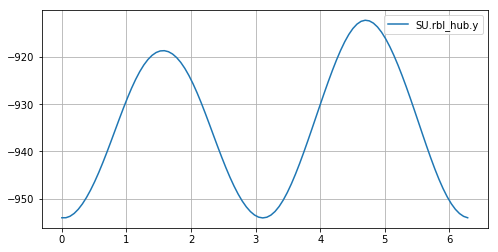

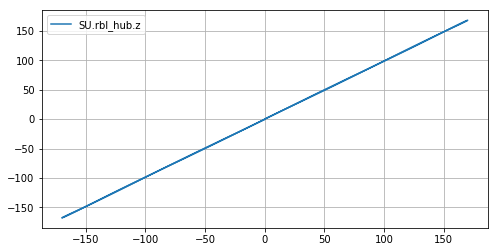

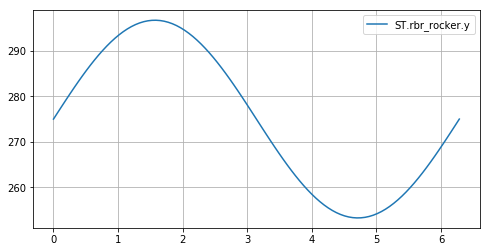

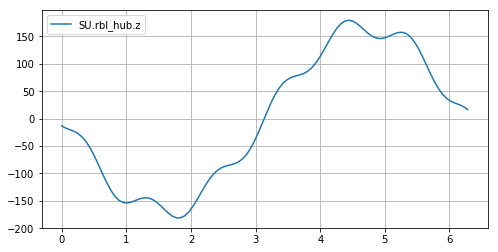

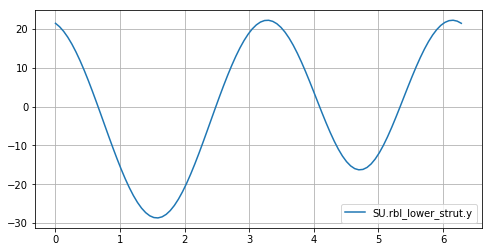

In [8]:
soln.plot([('SU.rbl_hub.y', 'pos')])
soln.plot([('SU.rbl_hub.z', 'pos')], vertical_travel)
soln.plot([('ST.rbr_rocker.y', 'pos')])

soln.plot([('SU.rbl_hub.z', 'acc')])
soln.plot([('SU.rbl_lower_strut.y', 'acc')])